In [0]:
# !pip install -qq qiskit

     |████████████████████████████████| 1.5MB 2.9MB/s 
     |████████████████████████████████| 21.3MB 1.0MB/s 
     |████████████████████████████████| 92kB 29.2MB/s 
     |████████████████████████████████| 81kB 27.5MB/s 
     |████████████████████████████████| 409kB 46.2MB/s 
     |████████████████████████████████| 522kB 49.0MB/s 
     |████████████████████████████████| 5.3MB 45.4MB/s 
     |████████████████████████████████| 51kB 21.6MB/s 
     |████████████████████████████████| 51kB 22.8MB/s 
     |████████████████████████████████| 51kB 20.8MB/s 
     |████████████████████████████████| 71kB 23.2MB/s 
     |████████████████████████████████| 532kB 47.5MB/s 
     |████████████████████████████████| 21.5MB 41.8MB/s 
     |████████████████████████████████| 2.3MB 35.9MB/s 
     |████████████████████████████████| 61kB 24.4MB/s 
     |████████████████████████████████| 61kB 22.7MB/s 
     |████████████████████████████████| 102kB 29.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1,

In [0]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [0]:
%matplotlib inline

In [58]:
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(1)

circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.h(qr)

option = int(input("""Please choose a function mapping from {0,1} to {0,1}. The quantum circuit will decide if it is constant ([1] or [2]) or not ([3] or [4]) in one query.
                [1] f(x)=0
                [2] f(x)=1
                [3] f(x)=x
                [4] f(x)=~x\n"""))

if option == 2:
    circuit.x(qr[1])
elif option == 3:
    circuit.cx(qr[0], qr[1])
elif option == 4:
    circuit.x(qr[0])
    circuit.cx(qr[0], qr[1])
    circuit.x(qr[0])
    
circuit.h(qr[0])
circuit.measure(qr[0], cr)

Please choose a function mapping from {0,1} to {0,1}. The quantum circuit will decide if it is constant ([1] or [2]) or not ([3] or [4]) in one query.
                [1] f(x)=0
                [2] f(x)=1
                [3] f(x)=x
                [4] f(x)=~x
1


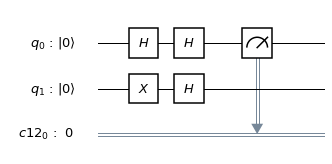

In [59]:
circuit.draw(output="mpl")

In [0]:
simulator = Aer.get_backend('qasm_simulator')
shots = 100
job = execute(circuit, simulator, shots=shots)
result = job.result()
counts = result.get_counts(circuit)

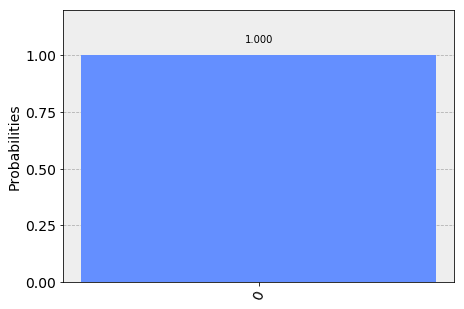

In [61]:
plot_histogram(counts)

In [62]:
if(counts.get('0') is not None and counts.get('0') > 0.8 * shots):
    print("The chosen function is constant.")
else:
    print("The chosen function is not constant.")

The chosen function is constant.
